In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("20240224.csv",encoding= 'unicode_escape',  index_col=0)

#View the original shape and check for missing values
print("Original data shape (rows, columns):")
print(df.shape)
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

print(df.head())


Original data shape (rows, columns):
(397, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ProductAlternateKey                  397 non-null    object 
 1   OLE DB Source ProductSubcategoryKey  0 non-null      float64
 2   WeightUnitMeasureCode                275 non-null    object 
 3   SizeUnitMeasureCode                  253 non-null    object 
 4   EnglishProductName                   397 non-null    object 
 5   SpanishProductName                   319 non-null    object 
 6   FrenchProductName                    319 non-null    object 
 7   StandardCost                         395 non-null    object 
 8   FinishedGoodsFlag                    397 non-null    bool   
 9   Color                                341 non-null    object 
 10  SafetyStockLevel                     397 non-null    i

In [2]:
# -------------------------------
# Step 2: Remove cols/rows with missing data
# -------------------------------

# Drop fully empty columns
df_no_missing = df.copy()
df_no_missing = df_no_missing.dropna(axis=1, how='all')


print("\nData shape after dropping rows with missing values:")
print(df_no_missing.shape)
print("Missing values after dropping:")
print(df_no_missing.isnull().sum())



Data shape after dropping rows with missing values:
(397, 36)
Missing values after dropping:
ProductAlternateKey                0
WeightUnitMeasureCode            122
SizeUnitMeasureCode              144
EnglishProductName                 0
SpanishProductName                78
FrenchProductName                 78
StandardCost                       2
FinishedGoodsFlag                  0
Color                             56
SafetyStockLevel                   0
ReorderPoint                       0
ListPrice                          2
Size                              98
SizeRange                         98
Weight                           122
DaysToManufacture                  0
ProductLine                       17
DealerPrice                        2
Class                             85
Style                             96
ModelName                          0
EnglishDescription                 1
FrenchDescription                  1
ChineseDescription                 1
ArabicDescription 

In [3]:
# -------------------------------
# Step 3: Convert data types
# -------------------------------
df_converted_types = df_no_missing.copy()
df_converted_types.info()

# Convert numeric columns from string to float
num_cols = ['StandardCost', 'ListPrice', 'Weight', 'DealerPrice']
for col in num_cols:
    df_converted_types[col] = df_converted_types[col].str.replace(",", ".", regex=False).astype(float).round(2)

# Convert date columns
df_converted_types['StartDate'] = pd.to_datetime(df_converted_types['StartDate'], errors='coerce')
df_converted_types['EndDate'] = pd.to_datetime(df_converted_types['EndDate'], errors='coerce')

# Clean string columns and convert to category
cat_cols = ['WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'Color', 'ProductLine', 'Class', 'Style', 'Status']
for col in cat_cols:
    df_converted_types[col] = df_converted_types[col].astype(str).str.strip().astype('category')

print("\nData types after conversion:")
print(df_converted_types.dtypes)


<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ProductAlternateKey            397 non-null    object
 1   WeightUnitMeasureCode          275 non-null    object
 2   SizeUnitMeasureCode            253 non-null    object
 3   EnglishProductName             397 non-null    object
 4   SpanishProductName             319 non-null    object
 5   FrenchProductName              319 non-null    object
 6   StandardCost                   395 non-null    object
 7   FinishedGoodsFlag              397 non-null    bool  
 8   Color                          341 non-null    object
 9   SafetyStockLevel               397 non-null    int64 
 10  ReorderPoint                   397 non-null    int64 
 11  ListPrice                      395 non-null    object
 12  Size                           299 non-null    object
 13  SizeRang

In [17]:
# -------------------------------
# Step 4: Fill missing values
# -------------------------------
df_missing_values = df_converted_types.copy()

# Fill category missing values with default values
cat_fill = {
    'WeightUnitMeasureCode': 'Unknown',
    'SizeUnitMeasureCode': 'Unknown',
    'Color': 'No color',
    'Class': 'No class',
    'Style': 'Unknown',
    'Status': 'Unknown'
}

for col, default in cat_fill.items():
    df_missing_values[col] = df_missing_values[col].cat.add_categories([default])
    df_missing_values[col] = df_missing_values[col].fillna(default).replace('nan', default)


# Fill language-specific names from English version
df_missing_values['SpanishProductName'] = df_missing_values['SpanishProductName'].fillna(df['EnglishProductName'])
df_missing_values['FrenchProductName'] = df_missing_values['FrenchProductName'].fillna(df['EnglishProductName'])

# Fill missing descriptions with placeholder
desc_cols = [col for col in df_missing_values.columns if 'Description' in col]
for col in desc_cols:
    df_missing_values[col] = df_missing_values[col].fillna('No description')

# Fill numeric columns with their mean
for col in ['StandardCost', 'ListPrice', 'Weight', 'DealerPrice']:
    df_missing_values[col] = df_missing_values[col].fillna(df_missing_values[col].mean())

# Fill string fields with sensible defaults
df_missing_values['Size'] = df_missing_values['Size'].fillna('No size')
df_missing_values['SizeRange'] = df_missing_values['SizeRange'].fillna('NA')
df_missing_values['ProductLine'] = df_missing_values['ProductLine'].fillna(df_missing_values['ProductLine'].mode()[0]).replace('nan', 'No line')
df_missing_values['EndDate'] = df_missing_values['EndDate'].fillna(pd.to_datetime('2099-12-31'))


print("\nMissing values after filling:")
print(df_missing_values.info())
print(df_missing_values.isnull().sum())



Missing values after filling:
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductAlternateKey            397 non-null    object        
 1   WeightUnitMeasureCode          397 non-null    category      
 2   SizeUnitMeasureCode            397 non-null    category      
 3   EnglishProductName             397 non-null    object        
 4   SpanishProductName             397 non-null    object        
 5   FrenchProductName              397 non-null    object        
 6   StandardCost                   397 non-null    float64       
 7   FinishedGoodsFlag              397 non-null    bool          
 8   Color                          397 non-null    category      
 9   SafetyStockLevel               397 non-null    int64         
 10  ReorderPoint                   397 non-null    int64      

/tmp/ipython-input-17-2215623630.py:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_missing_values[col] = df_missing_values[col].fillna(default).replace('nan', default)
/tmp/ipython-input-17-2215623630.py:37: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_missing_values['ProductLine'] = df_missing_values['ProductLine'].fillna(df_missing_values['ProductLine'].mode()[0]).replace('nan', 'No line')


In [18]:
# -------------------------------
# Step 5: Remove duplicate rows
# -------------------------------
df_no_duplicates = df_missing_values.copy()

# Drop duplicate rows
df_no_duplicates = df_no_duplicates.drop_duplicates()

print("\nShape after removing duplicate rows:")
print(df_no_duplicates.shape)
print(df_no_duplicates.info())




Shape after removing duplicate rows:
(397, 36)
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductAlternateKey            397 non-null    object        
 1   WeightUnitMeasureCode          397 non-null    category      
 2   SizeUnitMeasureCode            397 non-null    category      
 3   EnglishProductName             397 non-null    object        
 4   SpanishProductName             397 non-null    object        
 5   FrenchProductName              397 non-null    object        
 6   StandardCost                   397 non-null    float64       
 7   FinishedGoodsFlag              397 non-null    bool          
 8   Color                          397 non-null    category      
 9   SafetyStockLevel               397 non-null    int64         
 10  ReorderPoint                   397 non-nu

In [19]:
# -------------------------------
# Step 6: Add derived metric
# -------------------------------
df_no_duplicates['ProfitMargin'] = df_no_duplicates['DealerPrice'] - df_no_duplicates['StandardCost']
print(df_no_duplicates['ProfitMargin'])

# Select key numerical columns for descriptive statistics
key_numerical_cols = [
    'StandardCost',
    'ListPrice',
    'DealerPrice',
    'Weight',
    'SafetyStockLevel',
    'ReorderPoint',
    'DaysToManufacture'
]

# Generate descriptive statistics
descriptive_stats = df_no_duplicates[key_numerical_cols].describe().T

# Round for cleaner display
descriptive_stats = descriptive_stats[['mean', '50%', 'std', 'min', 'max']].rename(columns={
    '50%': 'median'
}).round(2)

# Display the table
print("\n", descriptive_stats)


ProductKey
NaN    14.329671
NaN    14.329671
NaN     8.160000
NaN     6.310000
NaN     7.900000
         ...    
NaN    15.790000
NaN    18.950000
NaN   -19.660000
NaN   -19.660000
NaN   -19.660000
Name: ProfitMargin, Length: 397, dtype: float64

                      mean  median     std   min      max
StandardCost       434.27  204.63  496.12  0.86  2171.29
ListPrice          747.66  364.09  836.59  2.29  3578.27
DealerPrice        448.60  218.45  501.95  1.37  2146.96
Weight              46.57   21.13  122.94  2.12  1050.00
SafetyStockLevel   282.85  500.00  220.42  4.00   500.00
ReorderPoint       212.14  375.00  165.31  3.00   375.00
DaysToManufacture    1.77    1.00    1.58  0.00     4.00


In [20]:
# -------------------------------
# Step 7: Write To Csv-file
# -------------------------------
df_no_duplicates.to_csv('clean_data.csv', index=False)
#print(df_no_duplicates.info())




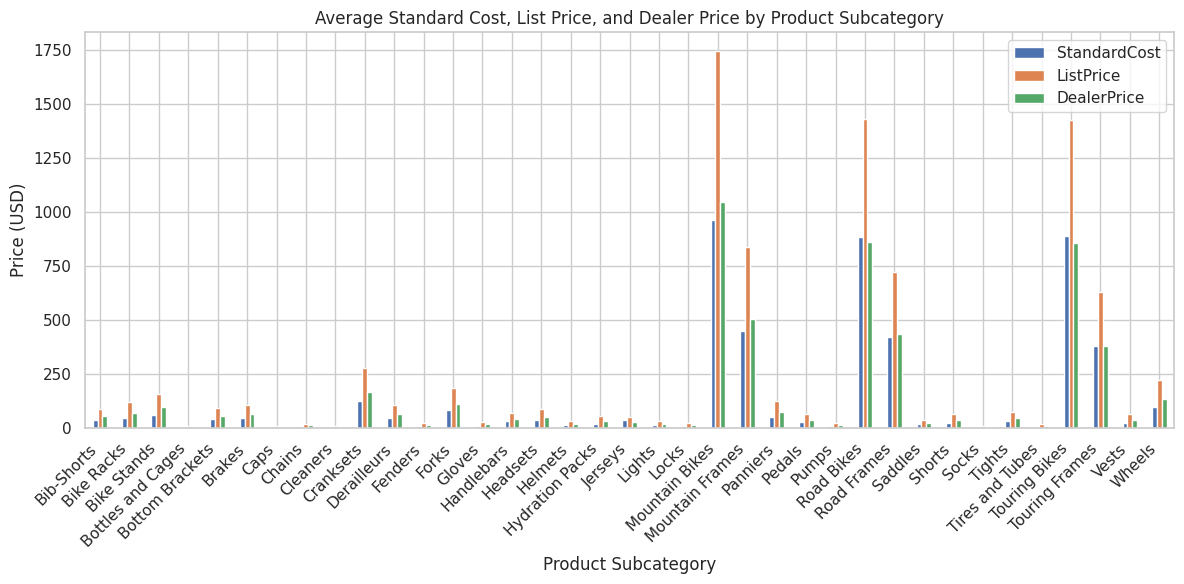

In [21]:
# -------------------------------
# Step 8: Visualizing the results
# -------------------------------

sns.set(style="whitegrid")
plt.rcParams.update({'figure.autolayout': True})  # auto layout fix

# 1. Average Standard Cost, List Price, and Dealer Price across different Product Subcategories.
price_df = df_no_duplicates.groupby('EnglishProductSubcategoryName')[['StandardCost', 'ListPrice', 'DealerPrice']].mean().reset_index()

price_df.plot(x='EnglishProductSubcategoryName', kind='bar', figsize=(12, 6))
plt.title('Average Standard Cost, List Price, and Dealer Price by Product Subcategory')
plt.xlabel('Product Subcategory')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 📊 Average Standard Cost, List Price, and Dealer Price by Product Subcategory

### 🧠 What this graph shows:

This grouped bar chart compares the **average Standard Cost**, **List Price**, and **Dealer Price** across different **Product Subcategories**.

- **X-axis:** Product Subcategories (e.g., Mountain Bikes, Road Frames, Helmets, Gloves, etc.)
- **Y-axis:** Price in USD
- **Bars color legend:**
  - 🟦 **Blue:** Average Standard Cost (Manufacturing Cost)
  - 🟧 **Orange:** Average List Price (Retail Price)
  - 🟩 **Green:** Average Dealer Price (Wholesale Price)

---

### 📌 Insights & Observations:

- **Highest Price Categories:**  
  The highest average prices are observed in **Mountain Bikes**, **Road Frames**, and **Touring Bikes**, often exceeding **$1000 USD**.

- **Typical Price Relationship:**  
  In most subcategories:  
  **List Price > Dealer Price > Standard Cost**,  
  which reflects a typical retail pricing model.

- **Profit Margin Insights:**  
  The largest price gaps (and likely the highest profit margins) appear in categories like **Mountain Bikes** and **Road Frames**.

- **Low-Cost Categories:**  
  Products like **Gloves**, **Socks**, and **Caps** show low price levels and smaller profit margins, which suggests high sales volume is needed to generate significant revenue.

- **Dealer Price Patterns:**  
  The difference between **Dealer Price** and **List Price** varies by category, which could indicate different discount strategies for dealers.

---

### 📌 Recommendations for Stakeholders:

- ✅ Focus sales and marketing efforts on **high-margin categories** (e.g., **Mountain Bikes**, **Road Frames**).
- ✅ Review pricing and promotional strategies for **low-margin categories** (e.g., **Gloves**, **Socks**).
- ✅ Analyze dealer discount policies in categories where **Dealer Price** is significantly lower than **List Price**.
- ✅ Use these insights to optimize production, pricing, and sales strategies.

---


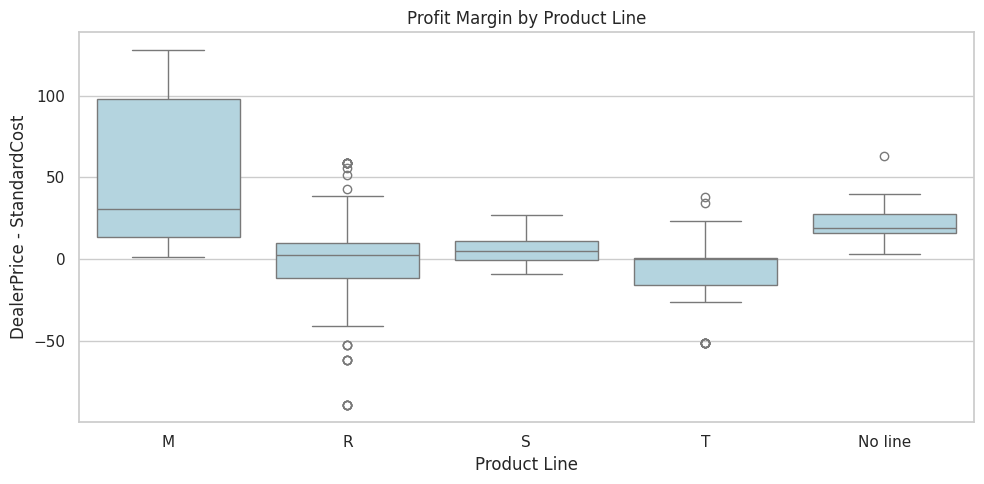

In [22]:

# 2. Boxplot: Profit Margin by Product Line
df_no_duplicates['ProfitMargin'] = df_no_duplicates['DealerPrice'] - df_no_duplicates['StandardCost']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_duplicates, x='ProductLine', y='ProfitMargin', color='lightblue')
plt.title('Profit Margin by Product Line')
plt.xlabel('Product Line')
plt.ylabel('DealerPrice - StandardCost')
plt.tight_layout()
plt.show()


### 📊 Profit Margin by Product Subcategory

#### 🧠 What this graph shows:

This **box plot** displays the **distribution of profit margins** (calculated as the difference between Dealer Price and Standard Cost) across different **Product Subcategories**.

- **X-axis:** Product Subcategories (e.g., Road Frames, Helmets, Socks, Mountain Bikes, Gloves, etc.).
- **Y-axis:** Profit Margin (in USD), which can be negative, zero, or positive.

---

#### 📌 Insights & Observations:

- **High Profit Margin Categories:**  
  Subcategories like **Mountain Bikes**, **Forks**, **Headsets**, and **Cranksets** show **significantly higher profit margins**, with many products exceeding **50 USD** in margin and some reaching over **100 USD**.

- **Negative Profit Margins:**  
  Categories such as **Bottom Brackets**, **Touring Bikes**, and **Caps** display **negative median profit margins**, indicating potential pricing issues or products sold at a loss.

- **Large Variability:**  
  **Mountain Bikes** and **Forks** exhibit **wide spread in margins**, suggesting inconsistency in pricing or production costs within these subcategories.

- **Stable Low-Margin Categories:**  
  Subcategories like **Gloves**, **Socks**, and **Lights** show **low but stable margins**, with smaller interquartile ranges and fewer outliers.

- **Presence of Outliers:**  
  Several categories, including **Mountain Bikes** and **Road Frames**, have noticeable outliers on both the positive and negative sides, indicating unusual pricing or special sales scenarios.

---

#### 📌 Recommendations:

- ✅ **Focus on High-Margin Categories:**  
  Prioritize marketing and sales efforts for **Mountain Bikes**, **Forks**, and **Headsets**, which demonstrate strong profitability.

- ✅ **Investigate Negative Margin Categories:**  
  Review **Touring Bikes**, **Bottom Brackets**, and **Caps** to determine if negative margins are due to discounting, high production costs, or data errors.

- ✅ **Address High Variability:**  
  Analyze the wide spread in margins for categories like **Mountain Bikes** and **Forks** to improve pricing consistency.

- ✅ **Review Outliers:**  
  Examine extreme outliers across categories to ensure data accuracy and assess if any special pricing strategies are affecting margins.


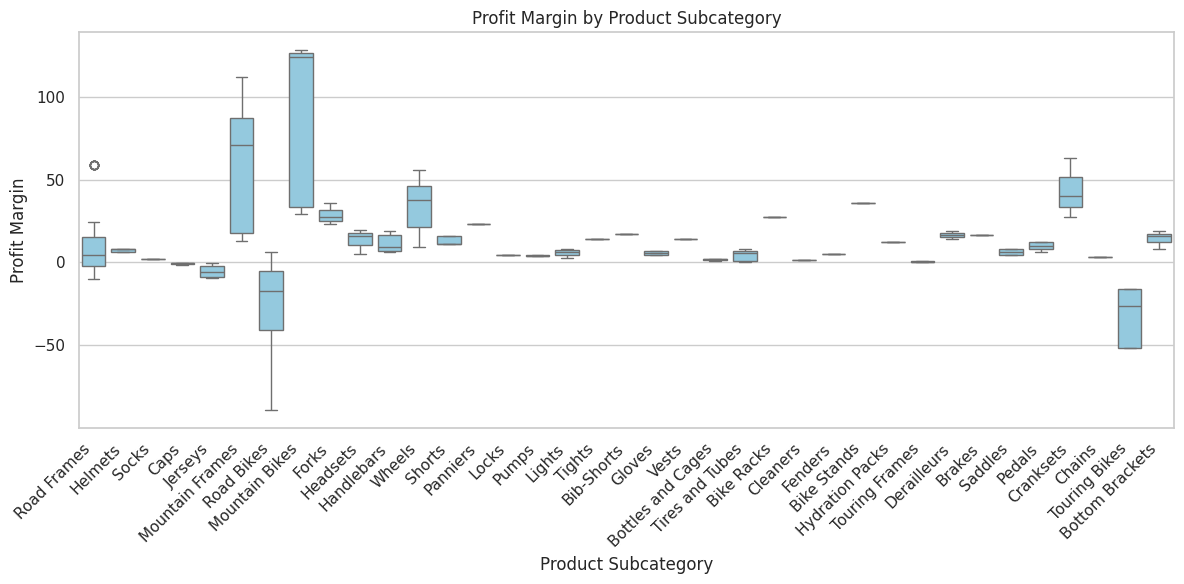

In [23]:
# 3. Boxplot: Profit Margin by Product Subcategory

plt.figure(figsize=(12, 6))
sns.boxplot(x='EnglishProductSubcategoryName', y='ProfitMargin', data=df_no_duplicates, color = 'skyblue')
plt.title('Profit Margin by Product Subcategory')
plt.xlabel('Product Subcategory')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-24-2253008108.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data = df_no_duplicates.pivot_table(index='Class', columns='Size', aggfunc='size', fill_value=0)


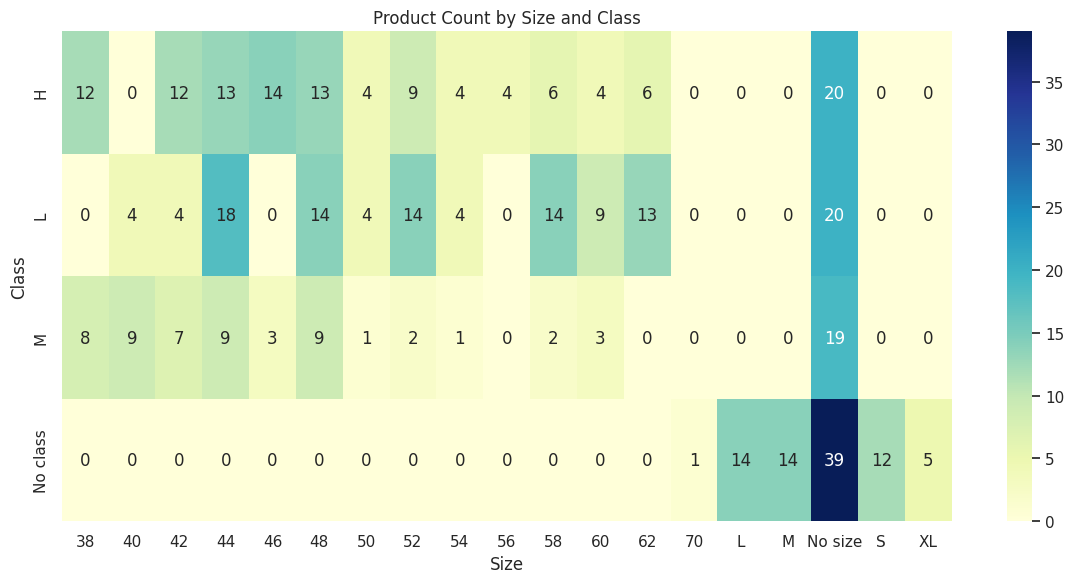

In [24]:
# 4. Heatmap: Product count by Size and Class
heat_data = df_no_duplicates.pivot_table(index='Class', columns='Size', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Product Count by Size and Class')
plt.xlabel('Size')
plt.ylabel('Class')
plt.tight_layout()
plt.show()


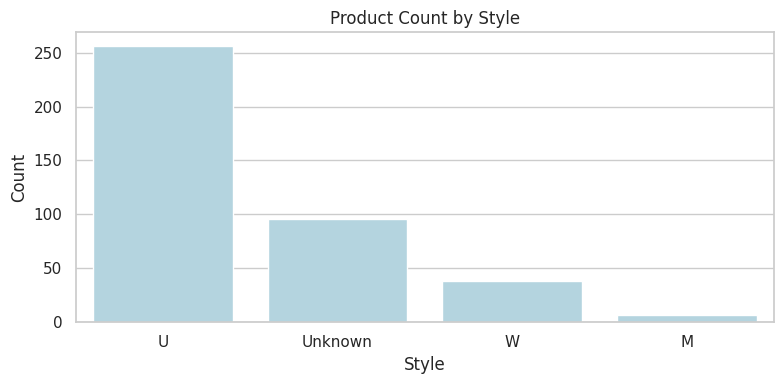

In [13]:
# 5. Countplot: Product count by Style
plt.figure(figsize=(8, 4))
sns.countplot(data=df_no_duplicates, x='Style', order=df_no_duplicates['Style'].value_counts().index, color='lightblue')
plt.title('Product Count by Style')
plt.xlabel('Style')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### 📊 Product Count by Style

#### 🧠 What this graph shows:
This bar chart illustrates the distribution of product counts across different Style categories.

- **X-axis:** Style categories (U, Unknown, W, M).
- **Y-axis:** Number of products in each style.

---

#### 📌 Insights & Observations:

- **U (Unisex):**  
  The most dominant style category, with over 250 products, indicating a strong focus on unisex products in the inventory.

- **Unknown:**  
  Contains around 90 products, suggesting that a significant portion of items have missing or undefined style information.

- **W (Women):**  
  Approximately 40 products are designated for women’s style.

- **M (Men):**  
  Very few products fall into this category (less than 10 items), making it the least represented style.

---

#### 📌 Recommendations:

- ✅ **Review Unknown Category:**  
  Investigate and update missing style information to improve data quality and reporting accuracy.

- ✅ **Assess Men’s Category:**  
  Consider evaluating whether the low number of men’s products aligns with market demand or indicates a potential growth area.

- ✅ **Focus on Unisex Trends:**  
  Analyze sales performance for unisex products to determine if the high count translates into strong sales, helping inform future inventory decisions.


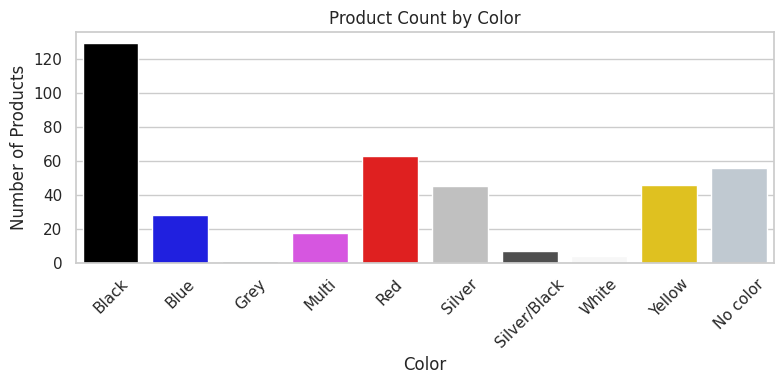

In [31]:
# 6. Countplot: Product Count by Color
color_map = {
    'Red': 'red',
    'Blue': 'blue',
    'Black': 'black',
    'Silver': 'silver',
    'Yellow': 'gold',
    'Silver/Black':'#4F4F4F',
    'No color': '#BDC9D4',
    'White': '#F7F7F7',
    'Multi': '#EA3FF7',
    'Grey': '#A9AEB8',
}

plt.figure(figsize=(8, 4))
sns.countplot(
    data=df_no_duplicates,
    x='Color',
    hue='Color',
    palette=color_map,
    legend=False
)
plt.title('Product Count by Color')
plt.xlabel('Color')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 🧠 What this graph shows:

This **bar chart** visualizes the **distribution of products** by their **color category**.

- **X-axis:** Different product colors (e.g., `Black`, `Red`, `Silver`, `Yellow`, etc.).
- **Y-axis:** Number of products available in each color category.
- **Color Palette:** A pastel color scheme has been used to visually distinguish each color category.

---

#### 📌 Insights & Observations:

- **Black:**  
  The most dominant color in the dataset, with more than **120 products**. This indicates a strong preference for black-colored products in the inventory.

- **Red:**  
  The second most frequent color, with around **60 products**. Red also appears to be a popular choice among products.

- **Silver and No Color:**  
  Both categories show moderate product counts, ranging from **40 to 50 products** each.  
  The `No color` category likely represents products without specified color data or those with neutral appearance.

- **Blue, Yellow, and Grey:**  
  These colors fall into the mid-range with **20–40 products** each, showing moderate demand or stock levels.

- **Multi, Silver/Black, and White:**  
  These are the least represented colors, each with fewer than **20 products**, suggesting either low demand or specialized/niche items.

---

#### 📌 Recommendations:

- ✅ **Focus on Black and Red:**  
  Given their high counts, these colors may represent high-demand products. Consider aligning future inventory planning accordingly.

- ✅ **Review No Color category:**  
  Investigate if products in this category are missing color data that should be filled in for accurate reporting.

- ✅ **Target Low-stock Colors:**  
  For categories like `Multi`, `Silver/Black`, and `White`, assess whether low stock is intentional (e.g., seasonal or specialty items) or if there is an unmet demand.

- ✅ **Further Analysis:**  
  Consider cross-referencing this color distribution with sales performance to identify the most profitable colors.

---


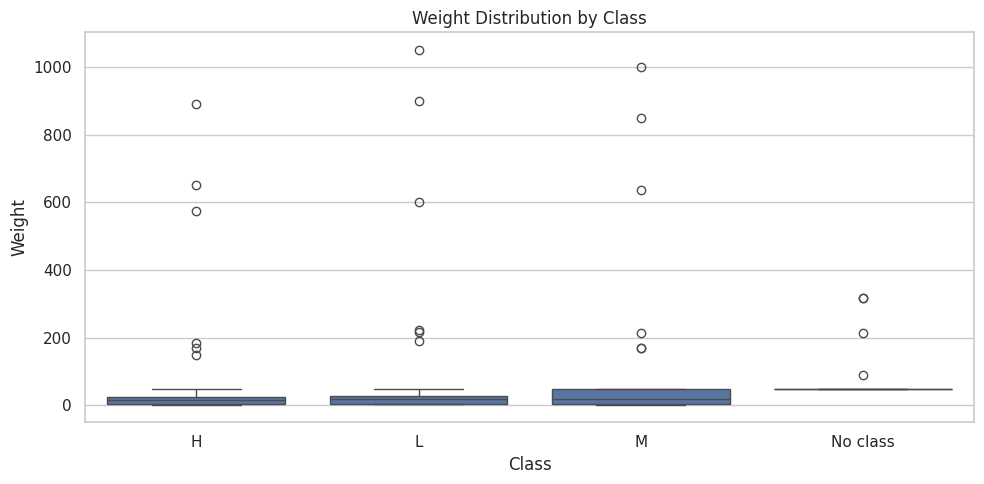

In [94]:
# 7. Boxplot: Weight by Class
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_duplicates, x='Class', y='Weight')
plt.title('Weight Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()


### 📊 Weight Distribution by Class

#### 🧠 What this graph shows:
This box plot displays the distribution of product weights across different Class categories.

- **X-axis:** Product Class (H, L, M, No class).
- **Y-axis:** Product weight (in relevant units).

---

#### 📌 Insights & Observations:

- **Weight Variability:**  
  All classes show a wide range of weights, with noticeable outliers above 200 units, especially in H, L, and M categories.

- **Typical Weight Range:**  
  Most products in all classes have weights concentrated below 50 units, as indicated by the size of the boxes (interquartile range).

- **Outliers:**  
  Each class contains several significant outliers, with some weights exceeding 600–1000 units, likely representing large or special items.

- **No Class:**  
  Products without a defined class (No class) also have a small but consistent weight distribution, with a few outliers.

---

#### 📌 Recommendations:

- ✅ **Review extreme outliers** to ensure data accuracy and check for potential data entry errors.

- ✅ **Consider analyzing** how weight relates to pricing, shipping costs, or sales performance.

- ✅ **Investigate the No class category** for possible data enrichment.


## 📌 Final Recommendations for Stakeholders

Based on the analysis of all seven visualizations, several key actions are recommended to help improve profitability, data quality, and decision-making across the product portfolio:

### ✅ 1. Optimize Sales and Marketing Strategies:
- Focus on **high-margin and high-demand categories** such as **Mountain Bikes**, **Road Frames**, and popular **color and style segments** (e.g., **Black**, **Red**, **Unisex**).
- Consider **targeted promotions** or **inventory expansion** for these profitable segments.

### ✅ 2. Address Low-Margin and Negative-Margin Products:
- Conduct a detailed **review of low or negative margin categories** (e.g., **Gloves**, **Socks**, **Touring Bikes**, **Bottom Brackets**, **Caps**, and certain **Product Lines like R, S, and T**).
- **Adjust pricing**, **production costs**, or **promotional strategies** where necessary.

### ✅ 3. Improve Data Quality and Completeness:
- **Investigate and update missing information** in key fields like **Product Class**, **Product Line**, **Style**, and **Color**.
- Reducing the number of products categorized as **‘Unknown’** or **‘No Class/No Line/No Color’** will improve the accuracy of future analysis and reporting.

### ✅ 4. Analyze Outliers and Data Anomalies:
- **Review extreme outliers** in metrics like **Profit Margin** and **Weight** to ensure there are no data entry errors.
- Understand if these outliers represent **special products**, **one-off promotions**, or **genuine business cases** that require separate analysis.

### ✅ 5. Refine Inventory and Production Planning:
- Use insights from **Size**, **Style**, **Color**, and **Class distributions** to align **production and inventory** with actual market demand.
- Focus manufacturing on **popular sizes**, **best-selling colors**, and **in-demand styles** while reviewing **underperforming segments** for potential rationalization.

### ✅ 6. Explore Cross-Segment Opportunities:
- Conduct further analysis to identify **profitable combinations of Class, Size, Style, and Color**.
- This can help **tailor marketing campaigns**, **develop targeted product bundles**, and **improve customer segmentation**.

### ✅ 7. Link Data Insights to Business Outcomes:
- Integrate these findings with **sales performance**, **customer preferences**, and **operational costs** to build a **data-driven approach to product lifecycle management**.
- **Regularly update and review product data** to support **dynamic pricing**, **inventory management**, and **strategic planning**.
